# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21
  254 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 102
  253 192   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163
  254 233   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

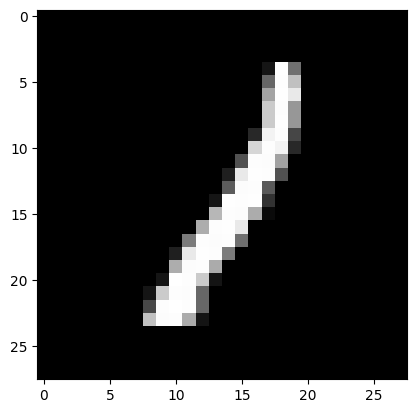

In [5]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images_orig.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

Label: 0


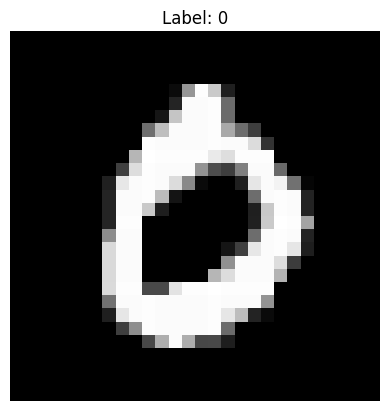

In [11]:
#your code here

image = test_images_orig[3]
label = test_labels[3]


print("Label:", label)
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


# A first look at a neural network

## **Step 1:** The network architecture

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [13]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [14]:
#your code here

print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)


Shape of train_images: (60000, 784)
Shape of test_images: (10000, 784)


### Tensor reshaping

In [ ]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [15]:
#your code here

a = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
a_reshaped = a.reshape((6, 1))
print("Reshaped matrix:\n", a_reshaped)


Reshaped matrix:
 [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

In [16]:
#your code here
#your code here
def relu(x):
   return np.maximum(0, x)


x = np.linspace(-5, 5, 100)
y = relu(x)

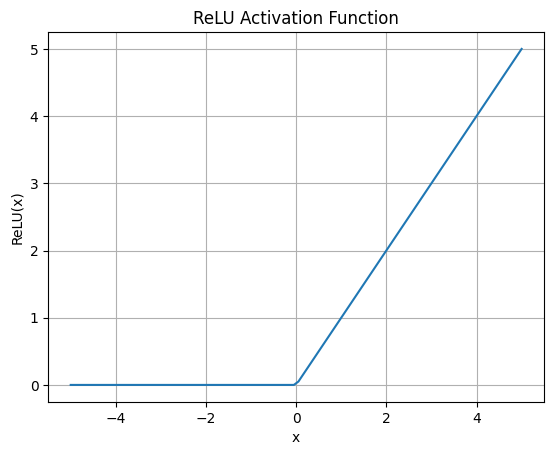

In [17]:
# my solution output
plt.plot(x, y)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid()
plt.show()

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)



your answer here:

hidden_layer_output = np.array([-10, 5, 0, -2, 6])
relu_output = relu(hidden_layer_output)

print("Result after passing through ReLU activation function:", relu_output)



### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

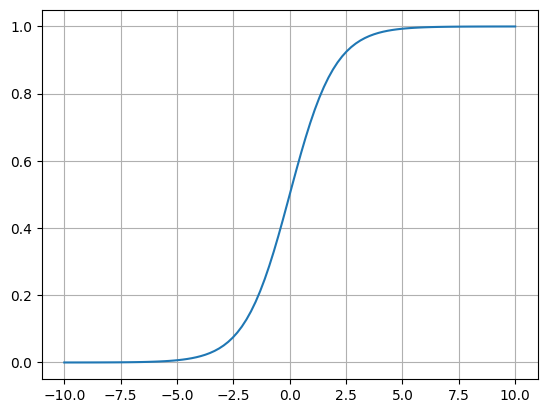

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

In [ ]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
#your code here
logits_scaled = ... #put your calculation instead of ...

#you code here for plotting
plt.xticks(np.arange(4))
plt.show()

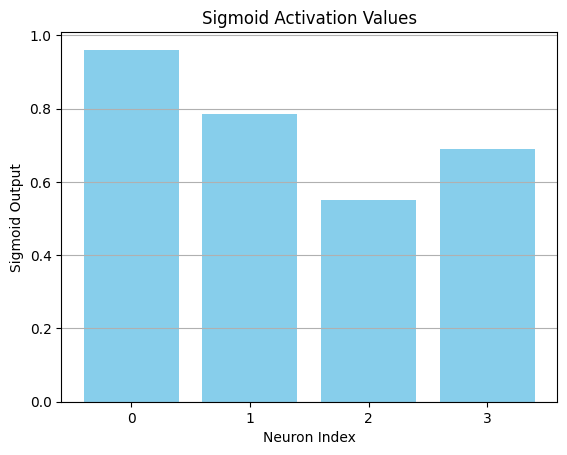

Sigmoid outputs: [0.96083428 0.78583498 0.549834   0.68997448]


In [20]:
#my solution output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
logits = np.array([3.2, 1.3, 0.2, 0.8])
logits_scaled = sigmoid(logits)
plt.bar(range(len(logits_scaled)), logits_scaled, color='skyblue')
plt.title("Sigmoid Activation Values")
plt.xlabel("Neuron Index")
plt.ylabel("Sigmoid Output")
plt.xticks(np.arange(4))
plt.grid(axis='y')
plt.show()

print("Sigmoid outputs:", logits_scaled)


This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [21]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [22]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs =  softmax(logits)
print("Softmax probabilities:", probs)
print("Sum of all probs:", sum(probs))

Softmax probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Sum of all probs: 1.0000000000000002


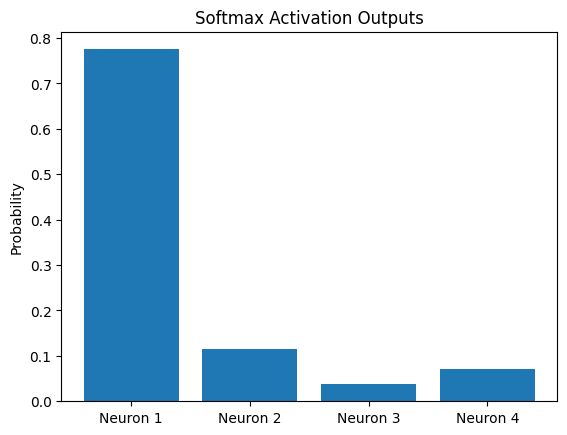

In [23]:
#my solution output
plt.bar(range(len(probs)), probs)
plt.xticks(np.arange(len(probs)), labels=["Neuron 1", "Neuron 2", "Neuron 3", "Neuron 4"])
plt.title("Softmax Activation Outputs")
plt.ylabel("Probability")
plt.show()

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [24]:
#your code here
predicted_class = np.argmax(probs)
print("Predicted label:", predicted_class)

Predicted label: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [25]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8754 - loss: 0.4333
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9662 - loss: 0.1191
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9787 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9849 - loss: 0.0513
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9892 - loss: 0.0385


## **Step 4:** Using the model to make predictions

In [27]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[1.5613322e-06, 9.5984785e-09, 5.2104173e-05, 7.1318517e-04,
        8.6779132e-11, 2.2082712e-07, 6.0381729e-13, 9.9921930e-01,
        9.4959489e-07, 1.2656703e-05],
       [3.5796123e-08, 2.6747364e-06, 9.9999189e-01, 4.3281275e-06,
        6.6137832e-15, 3.3071055e-07, 6.1640604e-09, 1.4904455e-13,
        7.5450725e-07, 9.6048169e-13],
       [1.1939094e-06, 9.9923408e-01, 1.9950813e-04, 1.8493527e-05,
        3.9241106e-05, 8.6080508e-06, 2.8828383e-06, 2.5904566e-04,
        2.3579854e-04, 1.0802769e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

Prediction array for the first image: [1.5613322e-06 9.5984785e-09 5.2104173e-05 7.1318517e-04 8.6779132e-11
 2.2082712e-07 6.0381729e-13 9.9921930e-01 9.4959489e-07 1.2656703e-05]
Predicted label for the first image: 7
Highest probability: 0.9992193


<ipython-input-28-a005b607c1eb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=predictions[0], palette="Set1")


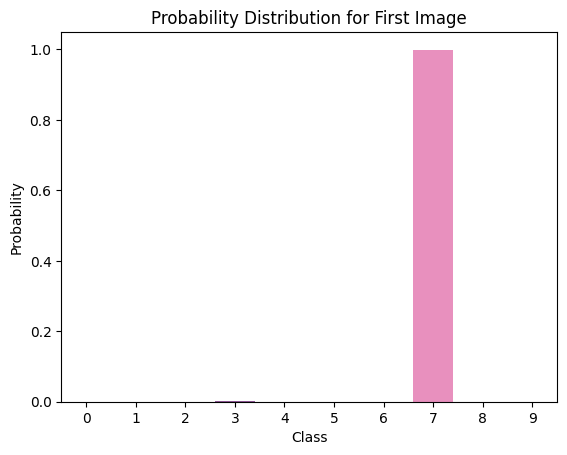

In [28]:
print("Prediction array for the first image:", predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label for the first image:", predicted_label)
print("Highest probability:", predictions[0][predicted_label])


import seaborn as sns
sns.barplot(x=np.arange(10), y=predictions[0], palette="Set1")
plt.title("Probability Distribution for First Image")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()


### See the result for the prediction of the first image

In [29]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[1.5613322e-06 9.5984785e-09 5.2104173e-05 7.1318517e-04 8.6779132e-11
 2.2082712e-07 6.0381729e-13 9.9921930e-01 9.4959489e-07 1.2656703e-05]
Predicted label:  7


In [30]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9992193


In [31]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


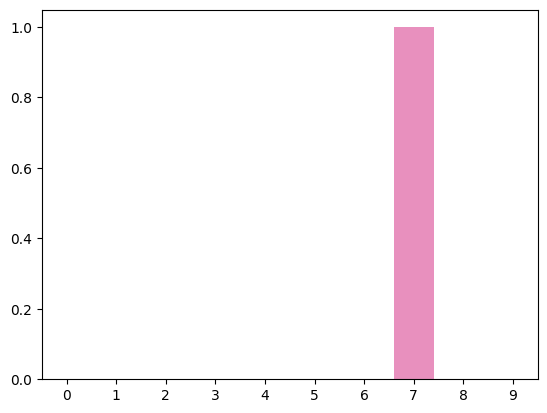

In [32]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [34]:
#your code here
test_image_4 = test_images[3].reshape(1, -1)
prediction_4 = model.predict(test_image_4)
predicted_label_4 = np.argmax(prediction_4)
print("Predicted label for the fourth test image:", predicted_label_4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted label for the fourth test image: 0


## **Step 5:** Evaluating the model on new data

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0815
Test Accuracy: 0.9782000184059143


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.